In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
df = pd.read_csv("MasterExperiment - MasterExperiment_edited.csv")

In [3]:
df

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations
0,0,-,IV,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser"
1,1,3,III,0.912,0.846154,1.867629,1.833927,0.054084,chaotic
2,2,4,III,0.792,0.769231,1.925619,1.775859,0.058037,NaN
3,3,11,III,0.768,0.692308,1.935429,1.826245,0.058151,similar to above
4,4,2,II,0.720,0.615385,1.950918,1.760495,0.006640,periodic behavior
...,...,...,...,...,...,...,...,...,...
385,8,9,NaN,0.440,0.307692,1.680965,1.352030,0.031829,NaN
386,9,6,NaN,0.288,0.230769,1.148326,0.991264,0.032023,NaN
387,10,11,NaN,0.264,0.153846,1.095147,0.773228,0.031775,NaN
388,11,4,NaN,0.144,0.076923,0.594619,0.391244,0.001274,NaN


In [4]:
df = df.dropna(subset=['Class'])

In [5]:
df['Class'] = df.Class.astype('category')

/home/sai/anaconda3/envs/CHEM420/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations
0,0,-,IV,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser"
1,1,3,III,0.912,0.846154,1.867629,1.833927,0.054084,chaotic
2,2,4,III,0.792,0.769231,1.925619,1.775859,0.058037,NaN
3,3,11,III,0.768,0.692308,1.935429,1.826245,0.058151,similar to above
4,4,2,II,0.720,0.615385,1.950918,1.760495,0.006640,periodic behavior
...,...,...,...,...,...,...,...,...,...
255,8,12,I,0.336,0.307692,1.501345,1.505876,0.001335,NaN
256,9,11,I,0.312,0.230769,1.351140,1.145110,0.001333,NaN
257,10,5,I,0.168,0.153846,0.798113,0.773228,0.001289,NaN
258,11,10,I,0.120,0.076923,0.529361,0.391244,0.001270,NaN


In [7]:
class_map = {"I": 0, "II": 0, "III": 2, "IV": 1}

In [8]:
df = df.replace({"Class": class_map})

In [9]:
df

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations
0,0,-,1,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser"
1,1,3,2,0.912,0.846154,1.867629,1.833927,0.054084,chaotic
2,2,4,2,0.792,0.769231,1.925619,1.775859,0.058037,NaN
3,3,11,2,0.768,0.692308,1.935429,1.826245,0.058151,similar to above
4,4,2,0,0.720,0.615385,1.950918,1.760495,0.006640,periodic behavior
...,...,...,...,...,...,...,...,...,...
255,8,12,0,0.336,0.307692,1.501345,1.505876,0.001335,NaN
256,9,11,0,0.312,0.230769,1.351140,1.145110,0.001333,NaN
257,10,5,0,0.168,0.153846,0.798113,0.773228,0.001289,NaN
258,11,10,0,0.120,0.076923,0.529361,0.391244,0.001270,NaN


In [10]:
df["Class"].values

array([1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df['Class'] = df.Class.astype('int')

In [12]:
df

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations
0,0,-,1,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser"
1,1,3,2,0.912,0.846154,1.867629,1.833927,0.054084,chaotic
2,2,4,2,0.792,0.769231,1.925619,1.775859,0.058037,NaN
3,3,11,2,0.768,0.692308,1.935429,1.826245,0.058151,similar to above
4,4,2,0,0.720,0.615385,1.950918,1.760495,0.006640,periodic behavior
...,...,...,...,...,...,...,...,...,...
255,8,12,0,0.336,0.307692,1.501345,1.505876,0.001335,NaN
256,9,11,0,0.312,0.230769,1.351140,1.145110,0.001333,NaN
257,10,5,0,0.168,0.153846,0.798113,0.773228,0.001289,NaN
258,11,10,0,0.120,0.076923,0.529361,0.391244,0.001270,NaN


In [13]:
df['Experiment'] = (df.index / 13).astype(int)

In [14]:
df

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations,Experiment
0,0,-,1,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser",0
1,1,3,2,0.912,0.846154,1.867629,1.833927,0.054084,chaotic,0
2,2,4,2,0.792,0.769231,1.925619,1.775859,0.058037,NaN,0
3,3,11,2,0.768,0.692308,1.935429,1.826245,0.058151,similar to above,0
4,4,2,0,0.720,0.615385,1.950918,1.760495,0.006640,periodic behavior,0
...,...,...,...,...,...,...,...,...,...,...
255,8,12,0,0.336,0.307692,1.501345,1.505876,0.001335,NaN,19
256,9,11,0,0.312,0.230769,1.351140,1.145110,0.001333,NaN,19
257,10,5,0,0.168,0.153846,0.798113,0.773228,0.001289,NaN,19
258,11,10,0,0.120,0.076923,0.529361,0.391244,0.001270,NaN,19


In [25]:
df[df.Class == 1]

,Step,Entry Zeroed,Class,Lambda,Lambda_t,H,H_t,Zeta,Observations,Experiment
0,0,-,1,0.992,0.923077,1.622804,1.669180,0.018679,"Similar pattern repeats, but trends to sparser",0
15,2,8,1,0.752,0.769231,2.269419,2.295466,0.068022,Looks like there's some structure,1
16,3,11,1,0.728,0.692308,2.233362,2.199688,0.017788,periodic and nonperiodic behavior,1
17,4,7,1,0.584,0.615385,2.044590,2.133938,0.019325,NaN,1
18,5,2,1,0.536,0.538462,1.888065,1.987773,0.035444,NaN,1
...,...,...,...,...,...,...,...,...,...,...
239,5,7,1,0.640,0.538462,2.205790,1.987773,0.038554,NaN,18
240,6,12,1,0.632,0.461538,2.197137,1.881095,0.020785,NaN,18
250,3,6,1,0.648,0.692308,2.070002,2.038160,0.024257,NaN,19
251,4,1,1,0.624,0.615385,2.034839,1.914341,0.020444,NaN,19


In [16]:
colors = cm.rainbow(np.linspace(0, 1, 20))
#print(colors)

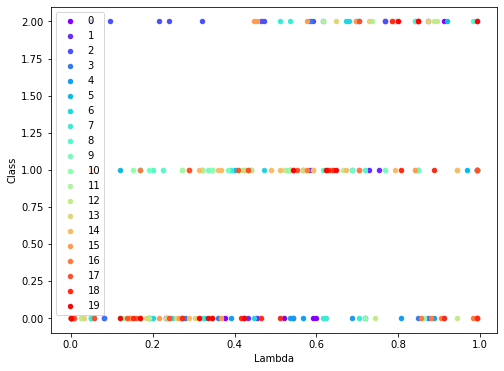

In [17]:
index = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, tmp_df in df.groupby('Experiment'):
    tmp_df.plot(x="Lambda", y="Class", kind="scatter", ax=ax, label=label, color=np.array([colors[index]]))
    index += 1
plt.legend()

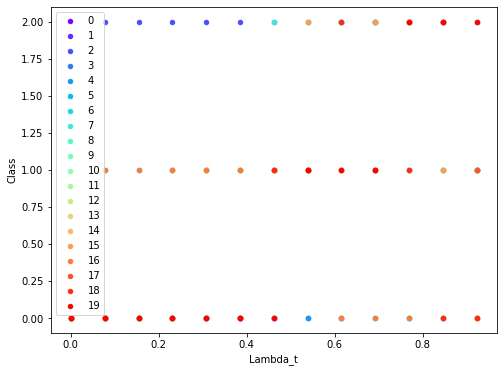

In [18]:
index = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, tmp_df in df.groupby('Experiment'):
    tmp_df.plot(x="Lambda_t", y="Class", kind="scatter", ax=ax, label=label, color=np.array([colors[index]]))
    index += 1
plt.legend()

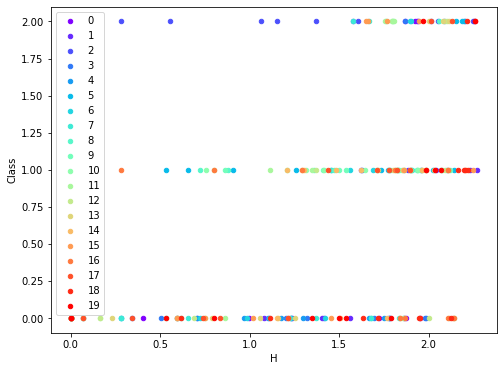

In [19]:
index = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, tmp_df in df.groupby('Experiment'):
    tmp_df.plot(x="H", y="Class", kind="scatter", ax=ax, label=label, color=np.array([colors[index]]))
    index += 1
plt.legend()

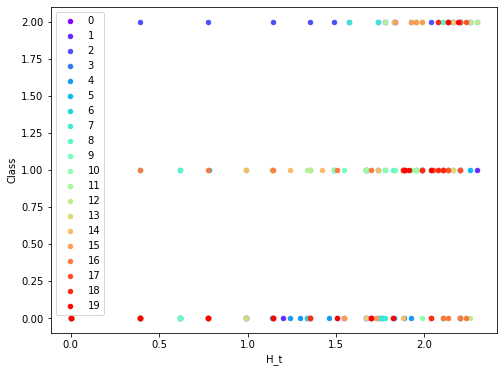

In [20]:
index = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, tmp_df in df.groupby('Experiment'):
    tmp_df.plot(x="H_t", y="Class", kind="scatter", ax=ax, label=label, color=np.array([colors[index]]))
    index += 1
plt.legend()

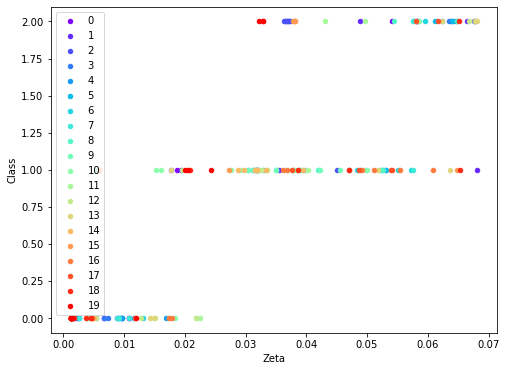

In [21]:
index = 0
fig, ax = plt.subplots(figsize=(8,6))
for label, tmp_df in df.groupby('Experiment'):
    tmp_df.plot(x="Zeta", y="Class", kind="scatter", ax=ax, label=label, color=np.array([colors[index]]))
    index += 1
plt.legend()

In [24]:
df[df.Class == 1].describe()

,Step,Class,Lambda,Lambda_t,H,H_t,Zeta,Experiment
count,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,4.827957,1.0,0.574022,0.551696,1.676877,1.712130,0.037956,10.408602
std,3.056083,0.0,0.253558,0.235083,0.438549,0.448452,0.013163,4.859407
min,0.000000,1.0,0.048000,0.076923,0.277840,0.391244,0.005540,0.000000
25%,2.000000,1.0,0.392000,0.384615,1.438107,1.488525,0.031495,7.000000
50%,5.000000,1.0,0.568000,0.538462,1.810527,1.881095,0.036808,10.000000
75%,7.000000,1.0,0.752000,0.769231,1.985561,2.038160,0.048662,14.000000
max,11.000000,1.0,0.992000,0.923077,2.269419,2.295466,0.068022,19.000000
